<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/nse_pe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [44]:
data= pd.read_csv("https://raw.githubusercontent.com/anirbanghoshsbi/data/main/data_fundamental.csv")

In [33]:
#data.set_index('Date',inplace=True)

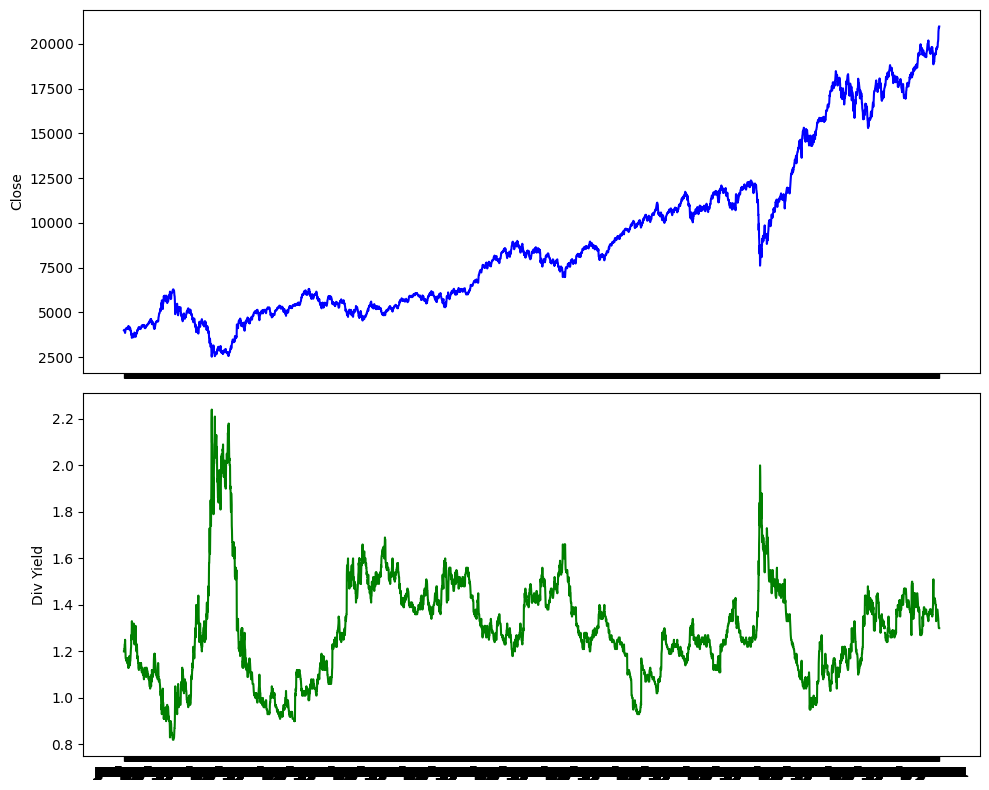

In [51]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot 'Close'
axs[0].plot(data['Date'], data['Close'], color='b')
axs[0].set_ylabel('Close')

# Plot 'Div Yield'
axs[1].plot(data['Date'], data['Div Yield'],  color='g')
axs[1].set_ylabel('Div Yield')

# Format date on x-axis to show only month and year
date_format = mdates.DateFormatter('%b %Y')
axs[1].xaxis.set_major_formatter(date_format)

# Display the plot
plt.tight_layout()
plt.show()

In [34]:
data['earnings']=data['Close']/data['P/E']

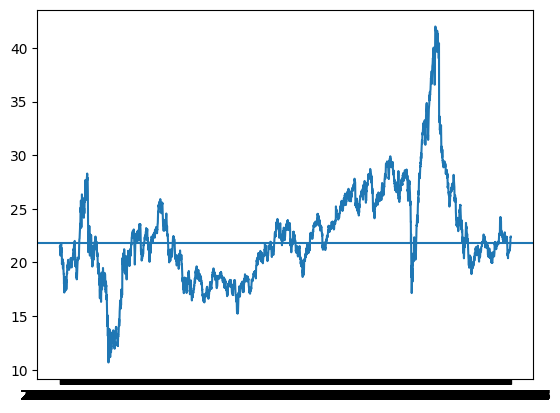

In [35]:
plt.plot(data['P/E'])
plt.axhline(y=data['P/E'].median());

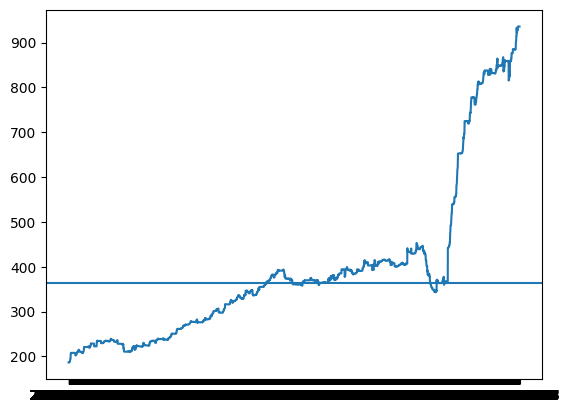

In [36]:
plt.plot(data['earnings'])#-data['earnings'].rolling(window=800).mean())
plt.axhline(y=data['earnings'].median());

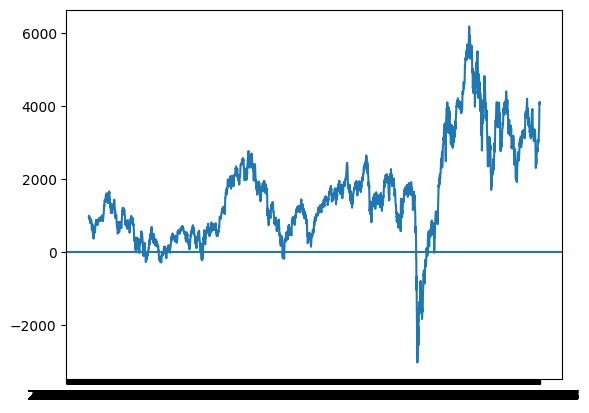

In [37]:
plt.plot(data['Close']-data['Close'].rolling(window=800).mean())
plt.axhline(y=0);

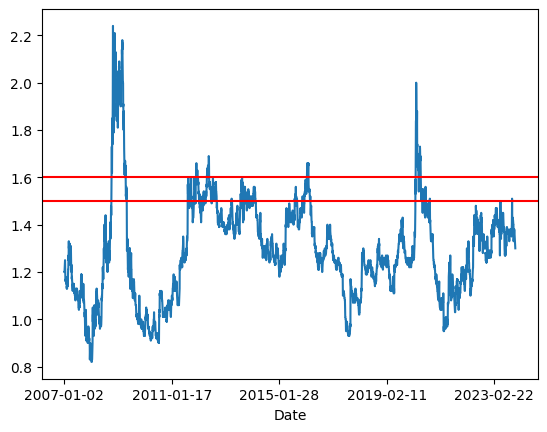

In [41]:
data['Div Yield'].plot()
plt.axhline(y=1.5,color='r');
plt.axhline(y=1.6,color='r');
